In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Conspecific_Tracking_ta_edit_117 as cs
from scipy import interpolate 
from scipy import misc
from beating import rotation
from beating import tail_spline
from functions import *
from hmmlearn import hmm

In [2]:
from auto_filter_full import  auto_scoring_tracefilter_full, transform_data

In [3]:
path = "h5files/h5 2/IM1_IM2_2.1.1_RDLC_resnet50_DLC_toptrackFeb27shuffle1_170000.h5"
f = pd.HDFStore(path,'r')
df = f.get('df_with_missing')
df.columns = df.columns.droplevel()

In [4]:
df=transform_data(df)

In [5]:
#pd.set_option('display.max_columns', None)
focus_cols=['A_head',"F_spine1",'mid_spine1_spine2',"G_spine2",'mid_spine2_spine3',"H_spine3","I_spine4","J_spine5","K_spine6","L_spine7",'C_tailbase','D_tailtip']
'''
i=1
fig=plt.figure()
for cols in focus_cols:
    ax=fig.add_subplot(4, 4, i)
    ax.hist(df[cols]['likelihood'])
    ax.title.set_text(cols)
    i=i+1
'''

"\ni=1\nfig=plt.figure()\nfor cols in focus_cols:\n    ax=fig.add_subplot(4, 4, i)\n    ax.hist(df[cols]['likelihood'])\n    ax.title.set_text(cols)\n    i=i+1\n"

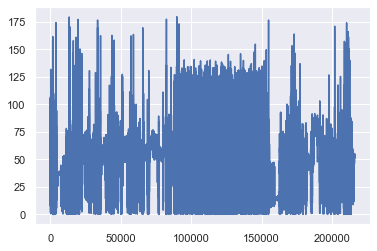

In [6]:
operculum=auto_scoring_get_opdeg(df)
operculum=operculum.fillna(method="ffill")
plt.plot(operculum)

In [7]:
focus_df=df[['A_head',"F_spine1",'mid_spine1_spine2',"G_spine2",'mid_spine2_spine3',"H_spine3","I_spine4","J_spine5","K_spine6",
             "L_spine7","B_rightoperculum",
                 'E_leftoperculum']]

In [8]:
filtered_df=auto_scoring_tracefilter_full(focus_df)

/Users/ryan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/ryan/Desktop/Fish Project/Scripts/auto_filter_full.py:37: RuntimeWarning: invalid value encountered in greater
  head_dist_check=head_dist>25 #assume normal, use 3 \sigma rule
/Users/ryan/Desktop/Fish Project/Scripts/auto_filter_full.py:63: RuntimeWarning: invalid value encountered in arccos
  angle=np.arccos(cos)/np.pi*180;angle_check=np.logical_or(np.logical_and(np.invert(np.isnan(angle)),angle>75),safety_check)
/Users/ryan/Desktop/Fish Project/Scripts/auto_filter_full.py:63: RuntimeWarning: invalid value encountered in greater
  angle=np.arccos(cos)/np.pi*180;angle_check=np.logical_or(np.logical_and(np.invert(np.isnan(angle)),angle>75)

In [9]:
duration=60
fps=40
starttime=100000

In [10]:
from moviepy.editor import VideoFileClip, VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [11]:
duration=60
fps=40
starttime=100000

In [12]:
from make_frame import make_frame_factory

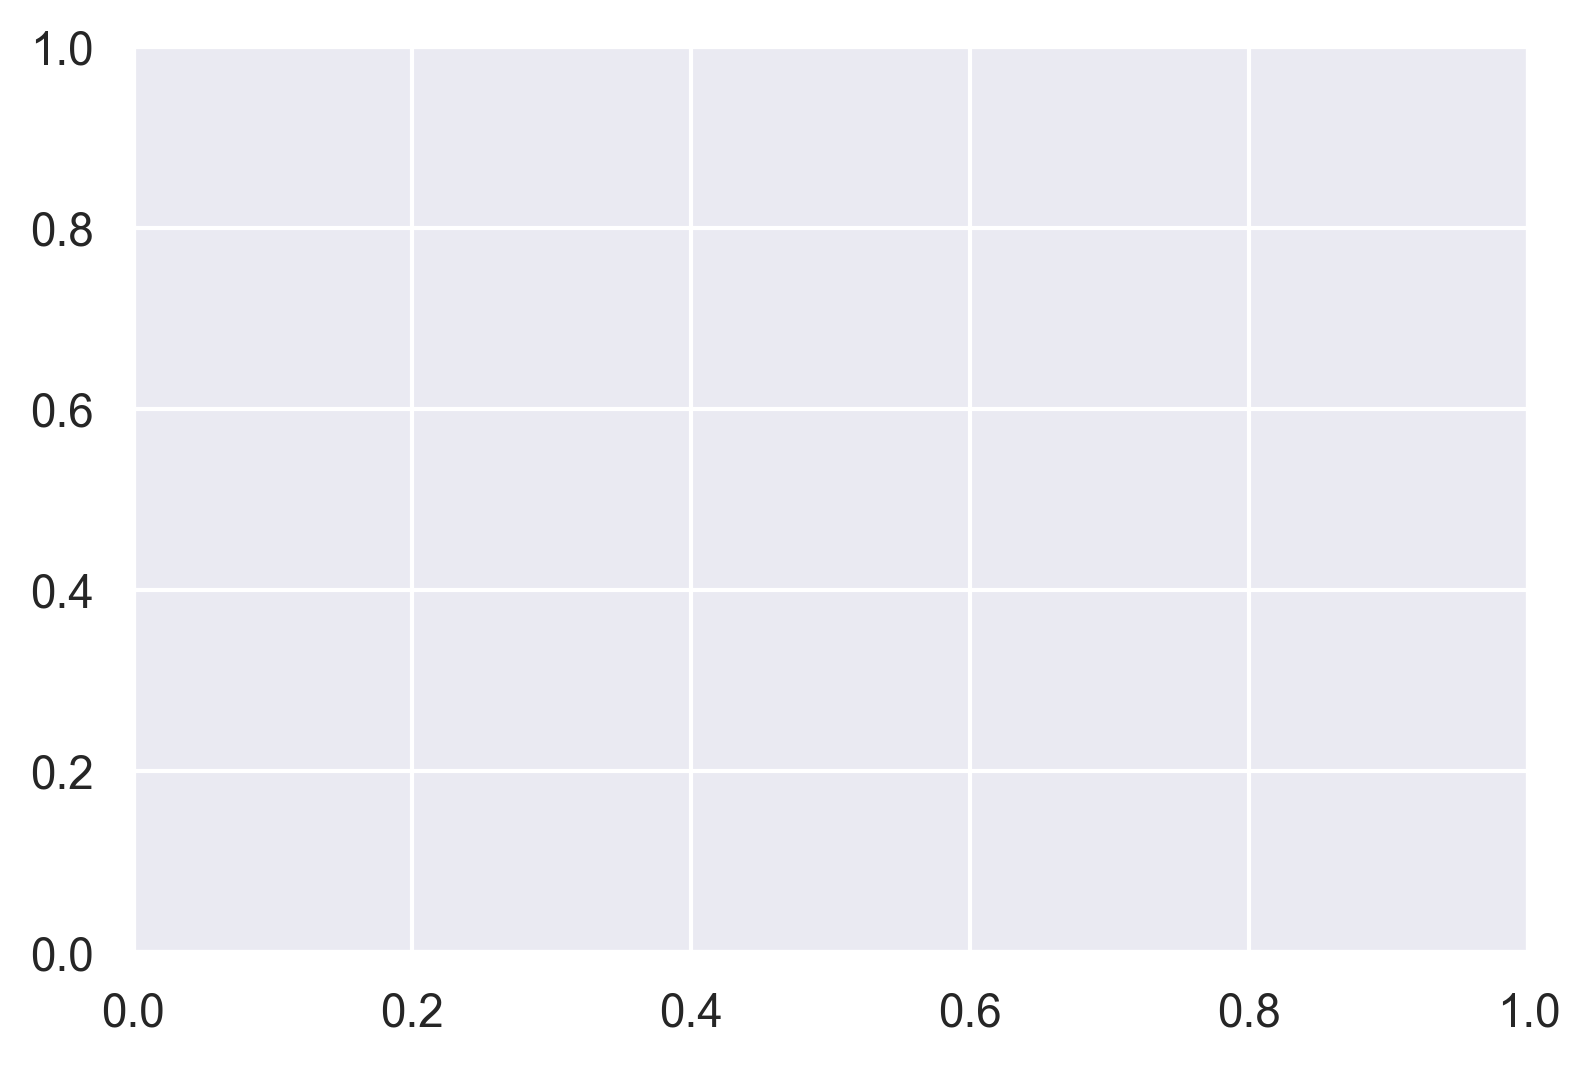

In [13]:
make_frame_withgill=make_frame_factory(starttime,duration,fps,focus_df,filtered_df)

In [14]:
#almost every single point in spine7 is filtered out
animation = VideoClip(make_frame_withgill, duration = duration)
animation.write_videofile("spline_IM1_IM2_R1e5.mp4", fps=40)

t:   0%|          | 3/2400 [00:00<02:11, 18.19it/s, now=None]

Moviepy - Building video spline_IM1_IM2_R1e5.mp4.
Moviepy - Writing video spline_IM1_IM2_R1e5.mp4



Moviepy - Done !
Moviepy - video ready spline_IM1_IM2_R1e5.mp4


In [20]:
from find_features import features

In [35]:
new_features=features(starttime=100000)
new_features.fit(filtered_df)

cluster on 2 groups


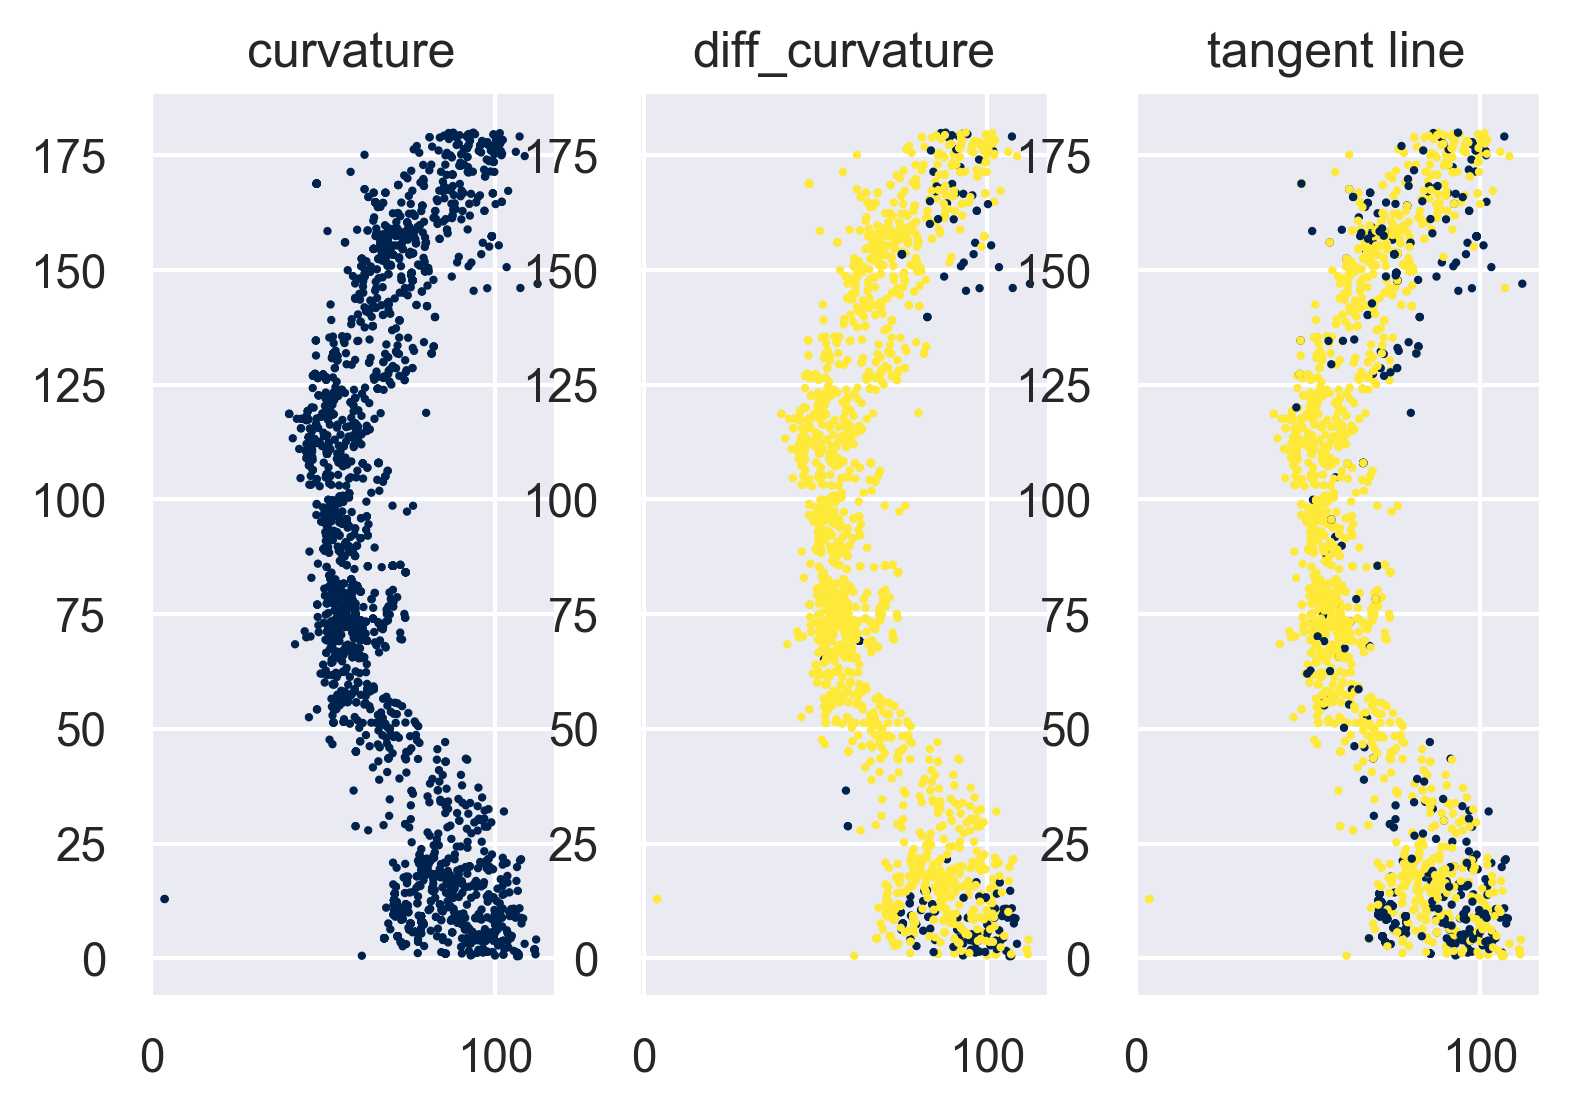

In [36]:
new_features.visualize_cluster(num_cluster=2,s=1)

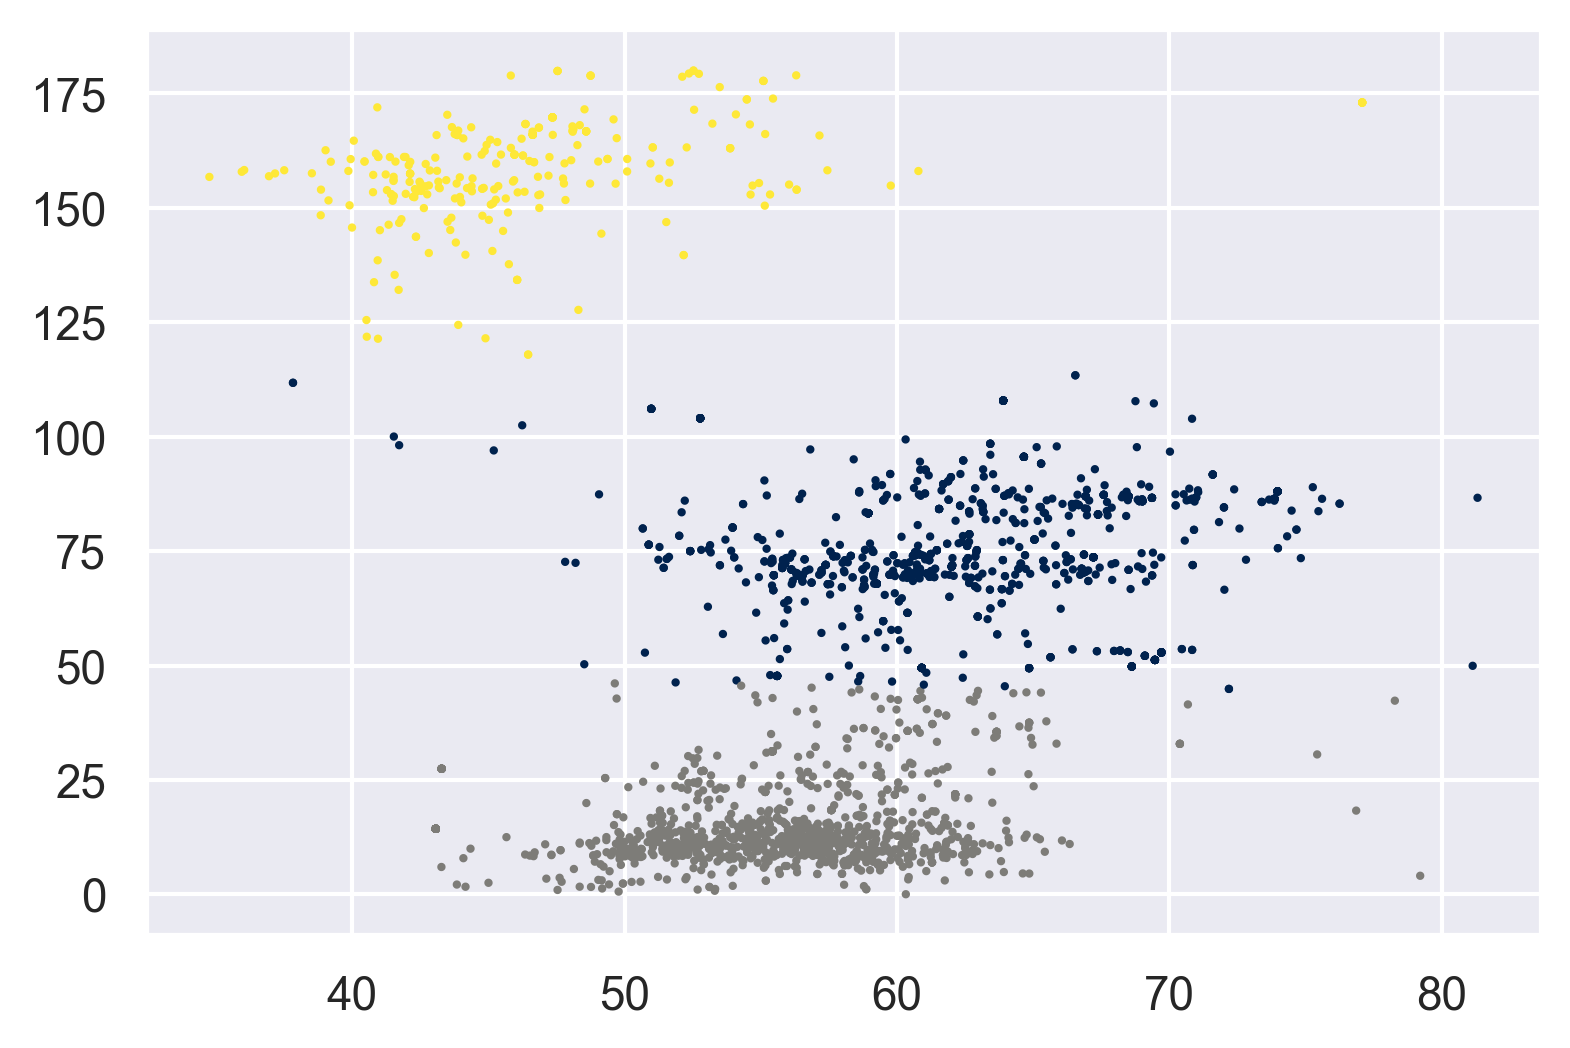

In [191]:
#kmeans applied directly to operculum x orientation
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=10)
kmeans.fit(np.array([new_features.operculum,new_features.ori]).T)
labels=kmeans.predict(np.array([new_features.operculum,new_features.ori]).T)
plt.figure(dpi=300)
plt.scatter(x=new_features.operculum,y=new_features.ori,s=1, c=labels, cmap='cividis')